
# Report (yw541)

## 1. Introduction
##### 1.1 Percolation on 2d lattice
##### 1.2 Percolation probability

## 2. Analysis of the computational physics aspects of the problem
##### 2.1 Programming procedure
##### 2.2 Time complexity


## 3. Details of implementation of the algorithm and its performance
##### 3.1 The "stupid method"
##### 3.2 The Hoshen-Kopelman Algorithm
##### 3.3 The Newman-Ziff Algorithm

## 4. Results and analysis
---

# 1 Introduction
Percolation is a phenomenon that occurs in many areas of physics, including materials science, fluid dynamics, and statistical mechanics. It involves studying the behavior of random patterns when the probability of occupying a site in the pattern is varied. A particular probability exists, known as the percolation probability, at which there is always a path connecting one side of the lattice to another side. The emergence of this connected path is called percolation, and it cannot be solved in most cases. The percolation probability is different for lattices in different dimensions and shapes. In this report, we will only consider a 2-dimensional square lattice and implement different algorithms to compare their time complexity.

## 1.1 Percolation on 2d lattice

The following Python code generates random patterns with varying probabilities and displays the resulting percolation patterns for each probability. The code uses the *'rand'* function from the *'numpy'* package to create a random array of size $L×L$. The array is then thresholded by setting any element less than a given probability **$p$** to 1, and any greater than or equal to **$p$** to 0. The resulting pattern is then labeled using the *'label'* function from the *'scipy.ndimage'* package. The labeled pattern is then analyzed to determine the size of each cluster using the measurements function from the same package. Finally, the size of each cluster is displayed using an image plot.

>The original code is from the book **Percolation theory using Python** by *Anders Malthe-Sørenssen*

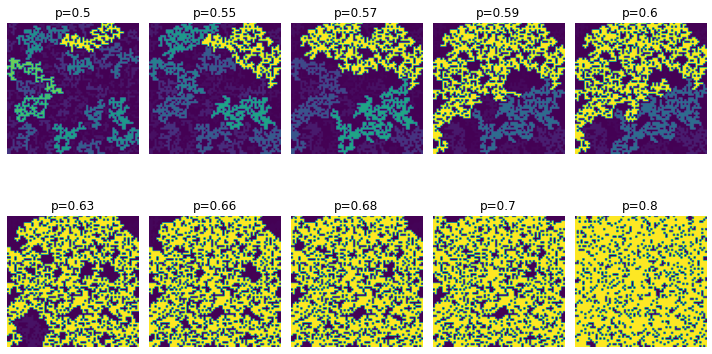

In [3]:
from pylab import *
from scipy.ndimage import measurements

# Define the size of the lattice and a list of probabilities to test
L = 70
pv = [0.5, 0.55, 0.57,0.59, 0.6,0.63,0.66,0.68,0.7,0.8]  

# Generate a random array of size L x L
z = rand(L, L)

# Create a 2 x 5 subplot of percolation patterns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Iterate over each probability and plot the resulting percolation pattern
for i in range(len(pv)):
    p = pv[i]
    m = z < p
    
    # Label the resulting pattern
    lw, num = measurements.label(m)
    
    # Calculate the size of each cluster
    area = measurements.sum(m, lw, index=arange(lw.max() + 1))
    areaImg = area[lw]
    
    # Add the plot to the subplot
    ax = axes[i // 5, i % 5]
    tit = 'p=' + str(p)
    ax.imshow(areaImg, origin='lower')
    ax.set_title(tit)
    ax.axis('off')

# Adjust subplot layout and display the plot
plt.tight_layout()
plt.show()


>The figure displays percolation patterns for different probabilities ranging from 0.5 to 0.8. The percolation probability, where there is always a path connecting one side of the lattice to another side, can be observed at a particular probability.

## 1.2 Percolation probability

Percolation is a type of phase transition where the system undergoes a sudden change in the size of the cluster. To determine the percolation probability, one can compute the size of the cluster at different values of the probability, and the percolation probability is considered to be the point where the cluster sizes abruptly increase.
### 1.2.1 Percolation Using Python
The program generates $N=100$ random matrices of size $L×L$ for each $L$ value in the list L_values=[25, 50, 300]. For each matrix and each value of $p$ in the sequence $p$, it performs a cluster analysis using the *'measurements.label()'* function from the *'scipy.ndimage'* module. If there is a spanning cluster for a given $p$ value, it adds the size of the cluster to the corresponding element of the array $M_i$ and increments the corresponding element of the array $N_i$.Note that $M_i$ represents the size of the spanning cluster and $N_i$ represents the number of experiments where percolation occurs.After iterating over all matrices and $p$ values, the program calculates the normalised number of percolation and spanning cluster size as 
$$P_i=\frac{N_i}{N}\quad \,\quad \ P_s=\frac{M_i}{N×L^2}$$

It then plots the results using subplots, with the $P_i$ on the left and $M_i$ on the right. The x-axis is labeled with $p$, and the y-axes are labeled with "$P_i$" and "$P_s$", respectively.The *tight_layout()* function is used to adjust the subplots to fit within the figure boundaries, and *show()* is used to display the figure.

>The original code is from the book **Percolation theory using Python** by *Anders Malthe-Sørenssen*

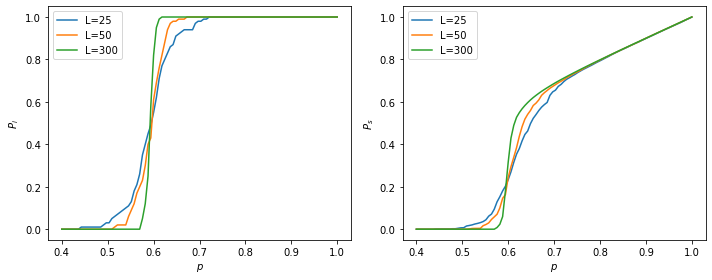

In [5]:
# Import required libraries
from pylab import *
from scipy.ndimage import measurements

# Set parameters
N = 100
L_values = [25, 50, 300]
p = linspace(0.4, 1.0, 100)

# Create figure
figure(figsize=(10, 4))

# Loop over L values
for L in L_values:
    # Initialize arrays for Ni and Mi
    Ni = zeros(len(p))
    Mi = zeros(len(p))
    
    # Repeat N times
    for i in range(N):
        # Generate random matrix
        z = rand(L, L)
        # Loop over p values
        for j in range(len(p)):
            # Threshold matrix
            m = z < p[j]
            # Label clusters
            lw, num = measurements.label(m)
            # Find spanning cluster
            perc_x = intersect1d(lw[0,:],lw[-1,:])
            perc = perc_x[where(perc_x>0)]
            # If there is a spanning cluster, update Ni and Mi
            if len(perc) > 0:
                Ni[j] += 1
                for k in perc:
                    area = measurements.sum(m, lw, k)
                    Mi[j] += area
    
    # Calculate percolation probability and density of spanning cluster
    Pi = Ni / N
    Ps = Mi / (N * L**2)
    
    # Create subplot for percolation probability
    subplot(1, 2, 1)
    plot(p, Pi, label=f"L={L}")
    xlabel("$p$")
    ylabel("$P_i$")
    legend()
    
    # Create subplot for density of spanning cluster
    subplot(1, 2, 2)
    plot(p, Ps, label=f"L={L}")
    xlabel("$p$")
    ylabel("$P_s$")
    legend()

# Adjust subplot layout and display figure
tight_layout()
show()


> It is easy to see that percolation/phase transition occurs when $p$ is around 0.59

### 1.2.2 Convention
In the following discussion, we will consider the size of the largest cluster without normalization for simplicity.

# 2 Analysis of the computational physics aspects of the problem

## 2.1 Programming procedure
In order to determine the percolation probability, a computational approach must be taken to describe the process of a lattice site being occupied with probability $p$ and the potential formation of a path connecting two sides of the lattice, which includes the following steps.

1. generating a matrix to represent the lattice, where elements are randomly chosen between 0 and 1

2. Specify the probability $p$ by setting a threshold value; if an element of the matrix is smaller than this value, then denote 1 meaning occupied, otherwise 0 meaning empty

3. generating a label matrix that assigns the same label to occupied sites within the same cluster

4. To check for percolation, the labels on opposing sides of the lattice are compared, and if they are the same, a path connecting the two sides has formed.

5. The size of the spanning cluster is then determined by counting the number of elements within the cluster

6. The above steps are repeated multiple times for different values of $p$ to find the critical value of $p$, at which the cluster sizes abruptly increase, indicating a phase transition.

7. Since the generation of the occupied lattice is random, the experiment is repeated several times for each $p$ value to obtain an average percolation probability.

## 2.2 Time complexity

In the percolation algorithm, the step 3: labeling dominates the time complexity because as the lattice grows and clusters become larger, the number of sites that need to be relabelled increases rapidly when two clusters merged togther. To reduce time complexity, three algorithms are considered:
1. The stupid method that relabels every neighbouring site
2. The HK algorithm which uses the union/find method
3. The Newman-Ziff algorithm which utilizes pointers.

### 2.2.1 The "stupid method"
The "stupid method" is an algorithm that generates the lattice layer by layer and labels sites while generating the occupied sites. This algorithm relies on a simplistic approach of labelling neighbouring sites with the same label, without utilizing any sophisticated techniques. The algorithm essentially generates an occupied site, checks its neighbouring sites, and assigns the same label to them if they are also occupied. This process is repeated for each site in the lattice. While this method is straightforward, it is inefficient and impractical for larger lattice sizes, as it requires a large number of label comparisons and assignments.

> upper bound on the time complexity: Not sure

### 2.2.2 The Hoshen-Kopelman Algorithm
The HK algorithm utilizes the standard union/find method to efficiently relabel clusters in a lattice. This algorithm maintains a tree data structure where each node represents a site in the lattice. Initially, each node is considered as its own root, but as sites are occupied and clusters are formed, the nodes corresponding to neighbouring sites are united, resulting in the creation of a larger tree. To relabel a cluster, the root node of one of the sites in the cluster is found, and this root node is assigned as the label for all sites in the cluster, thereby avoiding the need to relabel all sites individually.

> upper bound on the time complexity: $O(N^2)$

### 2.2.3 The Newman-Ziff Algorithm
Similarly, the Newman-Ziff algorithm employs the union/find approach expressed in terms of "pointers," and also incorporates path compression to further enhance the algorithm's performance. The Newman-Ziff algorithm commences by initializing each site as its own cluster with a size of 1. Sites are then randomly occupied, and pointers are followed to the root sites of each cluster to which they belong. The pointers are then adjusted to directly point to the corresponding root sites (path compression). If the root sites are different, a pointer is added from the root of the smaller cluster to the root of the larger one, thereby making the smaller tree a subtree of the larger one(weighted union). The larger cluster's size is updated by adding the size of the smaller one to it.

> upper bound on the time complexity: $O(Nlog(N))$

### 2.2.4 Derivation of the upper bounds on time complxity

Consider the case of a one-dimensional lattice with $N$ sites for simplicity, each site has at most two neighbors (left and right). When a site is connected, it becomes part of a "set" that represents a connected component. Initially, each site is its own set (i.e., it is the root of its own tree), and the size and height of each tree are both 1.

> The same result will generalize to the 2-d square lattice case

During the "join" operation, when two sets are connected (e.g., when a site and its left or right neighbor are connected), the weighted-union/find algorithm (Newman-Ziff algorithm) takes into account the size (i.e., the number of sites) in each set and makes the smaller set the child of the larger set, to keep the trees balanced. This ensures that the height of the tree remains relatively small and does not grow too much. In contrast, in the standard union/find algorithm (Hoshen-Kopelman algorithm), the growth of the tree is completely random without considering the size.

According to the analysis of the weighted-union algorithm, the height of any set is bounded by the logarithm of its size. In a one-dimensional lattice, the size of a set can be at most equal to the number of sites in the lattice, which is $N$. Therefore, the height of any set is at most
> $log(N)$ 

see [this post for more discussions](https://stackoverflow.com/questions/20420536/analyzing-time-complexity-of-union-find-algorithm), while in the standard union/find algorithm, it can be as high as 

> $N$

During the "find" operation, which is used to determine the root of a particular site, the algorithm follows the chain of parent pointers from the site to the root of the tree. Since the height of any set is at most $log(N)$, the "find" operation takes at most $O(log(N))$ time, while in the standard union/find algorithm, it takes $O(N)$ time.

The "join" and "find" operations are the main operations in the weighted-union algorithm, and their time complexities are both $O(log(N))$. Since the number of "join" operations is bounded by the number of connected pairs of sites, which is at most $N$ (as each site can have at most two neighbors), and the number of "find" operations is also bounded by $N$ (as there are n sites in total), the overall time complexity of the weighted-union algorithm for the percolation problem on a one-dimensional lattice is 
> $O(Nlog(N))$

while for the standard union/find algorithm, it is simply 

> $O(N^2)$.

refer to [Newman&Ziff's paper](https://arxiv.org/pdf/cond-mat/0101295.pdf) for more on this

# 3 Details of implementation of the algorithm and its performance

We implemented the following algorithms in Python and tested it on a laptop with an **Intel Core i5 processor** and **8 GB of RAM**. We tested the implementation on square lattices of size $100×100$, $200×200$, $300×300$, $500×500$, $700×700$ and $1000×1000$. We ran the algorithm 7 times for each system size and took the average time to get an estimate of the running time.

## 3.1 The "stupid method"


The algorithm starts by initializing the lattice as an array of zeros of size $L×L$. Then, for each site in the lattice, a random number between 0 and 1 is generated. If this number is less than or equal to the probability $p$, the site is marked as occupied by setting the corresponding element in the array to 1. If the number is greater than p, the site is left empty.Note that this procedure is being done from the top-left of the lattice to the bottom right.

Whenever a site is occupied, it is also asignned a label immediately according to the algorithm, which checks whether its three nearest neighbors (one from the previous layer and two from the same layer) are occupied. If a site is occupied and its neighbors are not, a new label is assigned to that site. If a site is occupied and one or more of its neighbors have already been assigned a label, the site is assigned the label of the neighbor. If a site is occupied and has multiple neighbors with different labels, all labels are merged into a single label and assigned to the site. This labeling algorithm groups together all connected occupied sites into clusters.

Finally, the algorithm checks whether there is percolation in the lattice, i.e. whether there is a continuous path of occupied sites from the top row to the bottom row. This is done by checking whether any of the occupied sites in the bottom row are connected to any of the occupied sites in the top row. If there is percolation, the algorithm identifies the largest cluster of connected occupied sites that spans the lattice in the vertical direction.

In [9]:
import random
import numpy as np

class Percolation:
    def __init__(self, L, p):
        # Initialize the lattice size and probability of occupation
        self.L = L
        self.p = p
        # Initialize a grid and label arrays
        self.grid = np.zeros((L, L), dtype=int) 
        self.labels = np.zeros((L, L), dtype=int)
        # Initialize a list of coordinates
        self.coord = [(i, j) for i in range(L) for j in range(L)]
       
    def generate_lattice(self):
        # Generate the occupied lattice randomly based on the given probability
        for i in range(self.L):
            for j in range(self.L):
                # For the top row
                if i == 0:
                    # Occupy the site with probability p
                    if random.random() < self.p:
                        # Set the site as occupied
                        self.grid[i][j] = 1
                        # Label the site
                        self.labels[i][j] = j + 1
                        # If the site is connected to another occupied site in the same row
                        if self.grid[i][j] == 1:
                                neighbors = []
                                # Find the neighboring sites in the same row
                                for x, y in [ (i, j-1), (i, j+1)]:
                                    if x >= 0 and x < self.L and y >= 0 and y < self.L and self.grid[x][y] == 1:
                                        neighbors.append(self.labels[x][y])
                                # If there are any neighboring sites
                                if neighbors:
                                    # Find the minimum label among neighboring sites
                                    min_label = min(neighbors)
                                    # Set the current site label as the minimum label
                                    self.labels[i][j] = min_label
                                    # Merge the neighboring clusters with different labels
                                    for neighbor in neighbors:
                                        if neighbor != min_label:
                                            self.labels = np.where(self.labels == neighbor, min_label, self.labels)
                                # If there are no neighboring sites, set the label as a unique one
                                else:
                                    self.labels[i][j] = self.L*(i) + j + 1
                # For the rest of the rows
                else:
                    # Occupy the site with probability p
                    if random.random() < self.p:
                        # Set the site as occupied
                        self.grid[i][j] = 1
                        # Label the site
                        self.labels[i][j] = j + 1
                        # If the site is connected to another occupied site
                        if self.grid[i][j] == 1:
                                neighbors = []
                                # Find the neighboring sites in the adjacent rows and columns
                                for x, y in [ (i-1,j), (i, j-1), (i, j+1)]:
                                    if x >= 0 and x < self.L and y >= 0 and y < self.L and self.grid[x][y] == 1:
                                        neighbors.append(self.labels[x][y])
                                # If there are any neighboring sites
                                if neighbors:
                                    # Find the minimum label among neighboring sites
                                    min_label = min(neighbors)
                                    # Set the current site label as the minimum label
                                    self.labels[i][j] = min_label
                                    # Merge the neighboring clusters with different labels
                                    for neighbor in neighbors:
                                        if neighbor != min_label:
                                            self.labels = np.where(self.labels == neighbor, min_label, self.labels)
                                # If there are no neighboring sites, set the label as a unique one
                                else:
                                    self.labels[i][j] = self.L*(i) + j + 1

    def check_percolation(self):
        # Create sets of non-zero labels in the bottom and top rows
        bottom_row_labels = set(np.setdiff1d(self.labels[-1], [0]))
        top_row_labels = set(np.setdiff1d(self.labels[0], [0]))
        # Find the intersection of labels that appear in both sets
        percolating_labels = bottom_row_labels.intersection(top_row_labels)

        # If there are percolating labels
        if percolating_labels:
            largest_cluster_area = 0
            # Find the largest cluster area among the percolating clusters
            for label in percolating_labels:
                cluster_area = np.sum(self.labels == label)
                if cluster_area > largest_cluster_area:
                    largest_cluster_area = cluster_area
            return largest_cluster_area
        else:
            # If there are no percolating clusters, return 0
            return 0
        
p = Percolation(6, 0.5) 
p.generate_lattice() 
print("Original lattice matrix:")
print(p.grid) 
print("Label matrix:")
print(p.labels)

largest_cluster_area = p.check_percolation()
print("largest_cluster_area")
print(largest_cluster_area)

Original lattice matrix:
[[0 1 1 1 1 1]
 [1 0 0 0 1 0]
 [1 0 1 0 1 0]
 [1 0 0 0 1 1]
 [0 1 0 0 0 1]
 [1 1 1 0 1 1]]
Label matrix:
[[ 0  2  2  2  2  2]
 [ 7  0  0  0  2  0]
 [ 7  0 15  0  2  0]
 [ 7  0  0  0  2  2]
 [ 0 26  0  0  0  2]
 [26 26 26  0  2  2]]
largest_cluster_area
12


> The code runs correctly as the neighbouring sites are assigned the same label, size of the spanning cluster is also computted correctly

 The code below is used to calculate the average largest cluster area for different values of probability *p* of generating a site on a 2D lattice. It uses the *'Percolation'* class from the previous code snippet to generate a lattice with 100 rows and columns, and assigns a probability *p* to each site. It repeats this process *5 times* for each *p* value to get a more accurate estimation of the largest cluster area. 

 The *'largest_cluster_areas'* array is used to store the largest cluster area for each run of the simulation. The *'mean_largest_cluster_areas array'* is then computed by taking the mean of the largest cluster area over the 5 runs for each *p* value. Finally, the *'p_values'* and *'mean_largest_cluster_areas'* arrays are plotted using the plot function from the pylab module. 
 
The resulting plot shows the relationship between the probability *p* and the average largest cluster area, which is a measure of the extent of percolation. The plot can help us understand the critical point at which the system undergoes a percolation phase transition.

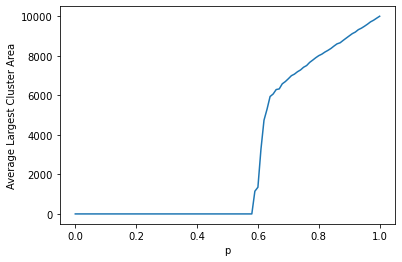

In [12]:
import numpy as np
import random
import time
import pylab
p_values = np.linspace(0, 1, num=101)
n_repeats = 5
largest_cluster_areas = np.zeros((len(p_values), n_repeats))

for i, p in enumerate(p_values):
    for j in range(n_repeats):
        percolation = Percolation(100, p)
        percolation.generate_lattice()
        largest_cluster_areas[i, j] = percolation.check_percolation()

mean_largest_cluster_areas = np.mean(largest_cluster_areas, axis=1)

plt.plot(p_values, mean_largest_cluster_areas)
plt.xlabel('p')
plt.ylabel('Average Largest Cluster Area')
plt.show()

> This plot imples that the algorithm is indeed working since the plot agrees with the one we have seen at the begining of the report, i.e. a phase transition around $p=0.59$

The following code measures the running time of the Percolation class on lattices of different sizes, and plots the results on a log-log scale.
>(Too keep the system size large, the following runs very slowly)

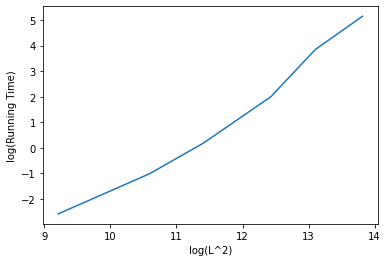

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import time

# This function generates a lattice of size L and runs the Percolation algorithm on it, 
# measuring the running time and returning the average time taken.
def measure_time(L):
    p = 0.5
    
    time_list = []  # Create an empty list to store the time taken
    start_time = time.time()  # Start the timer
    percolation = Percolation(L, p)  # Create a Percolation object with size L and probability p
    percolation.generate_lattice()  # Generate the lattice
    largest_cluster_area = percolation.check_percolation()  # Check if there is percolation and get the size of the largest cluster
    end_time = time.time()  # Stop the timer
    time_taken = end_time - start_time  # Calculate the time taken
    time_list.append(time_taken)  # Add the time taken to the list
        
    return np.mean(time_list)  # Return the average time taken

# Define the lattice sizes to test
L_values = [100, 200, 300, 500, 700, 1000]

# Take the log of the lattice sizes to use as the x-axis for the plot
log_L_values = [np.log(L**2) for L in L_values]

# Measure the running time of the Percolation algorithm for each lattice size
avg_time_list = [measure_time(L) for L in L_values]

# Take the log of the running times to use as the y-axis for the plot
log_time_list = [np.log(t) for t in avg_time_list]

# Plot the results on a log-log scale
plt.plot(log_L_values, log_time_list)
plt.xlabel('log(L^2)')
plt.ylabel('log(Running Time)')
plt.show()


> This is not quite a straight line meaning that the scaling relation is not simply a power law on the size of the system. But let's assume it is straight and see what gradient we get

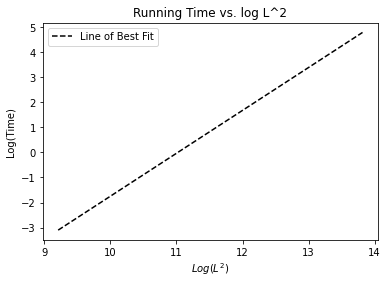

Gradient: 1.7127704285596235


In [36]:
import numpy as np
import random
import time
import pylab
fit = np.polyfit(log_L_values, log_time_list, 1)
fit_fn = np.poly1d(fit) 
pylab.plot(log_L_values, fit_fn(log_L_values), '--k', label="Line of Best Fit")

pylab.xlabel("$Log(L^2)$")
pylab.ylabel("Log(Time) ")
pylab.title("Running Time vs. log L^2")
pylab.legend()
pylab.show()
print("Gradient:", fit[0])

> This gradient means that the time complexity is given by $O(N^{1.71})$

## 3.2 The Hoshen-Kopelman Algorithm

The HK algorithm uses two functions, union and find, to compute equivalence classes and representative members, which can be used to efficiently assign labels to occupied sites. A union operation is performed to specify that these neighboring sites are in fact members of the same equivalence class (cluster). Then a find operation is performed to find a representative member of that equivalence class with which to label the current cell.

In 'the stupid method', the label assignment runs parallel to the site occupation, where no smart work was done. However, in this HK algorithm, the occupied lattice will be generated at first, followed by the label assignment using HK (union/find) algorithm. In particular, for each occupied site in the lattice:
1. Check if any of its neighboring sites have already been assigned a label.
2. If one or more neighboring sites have already been labeled, perform a union operation to merge the current site's label with its neighbors' labels.
3. Perform a find operation to find the representative member of the merged labels and assign it to the current site.
4. Update the dictionary with the new label and its size.
5. If none of the neighboring sites have been labeled, assign a new label to the current site and update the dictionary.
6. Raster-scan the lattice a second time, performing only find operations at each site. Re-label each site with its final representative label.
7. Check whether there is percolation in the lattice by checking whether any of the occupied sites in the bottom row are connected to any of the occupied sites in the top row.
8. If there is percolation, identify the largest cluster of connected occupied sites that spans the lattice.

In [31]:
import random

def generate_lattice(n, p):
    # Generate an n-by-n lattice with each site occupied with probability p
    lattice = [[int(random.random() < p) for i in range(n)] for j in range(n)]
    return lattice

def print_lattice(lattice):
    # Print out the lattice
    n = len(lattice)
    for i in range(n):
        for j in range(n):
            print(lattice[i][j], end=' ')
        print()

def print_label_matrix(label_matrix):
    # Print out the label matrix
    n = len(label_matrix)
    for i in range(n):
        for j in range(n):
            print(label_matrix[i][j], end=' ')
        print()

def uf_find(x):
    while labels[x] != x:
        x = labels[x]
    return x


def uf_union(x, y):
    # Join the sets containing x and y
    labels[uf_find(x)] = uf_find(y)
    return labels[uf_find(x)]


def uf_make_set():
    # Create a new set and return its label
    labels[0] += 1
    assert labels[0] < n_labels
    labels[labels[0]] = labels[0]
    return labels[0]


def uf_initialize(max_labels):
    # Initialize the union-find data structure
    global n_labels, labels
    n_labels = max_labels
    labels = [0] * n_labels


def uf_done():
    # Clean up the union-find data structure
    global n_labels, labels
    n_labels = 0
    labels = None


def hoshen_kopelman(matrix):
    # Apply the Hoshen-Kopelman algorithm to a matrix
    m, n = len(matrix), len(matrix[0])
    uf_initialize(m * n // 2)
  
    for i in range(m):
        for j in range(n):
            if matrix[i][j]:  # if occupied ...
                up = matrix[i-1][j] if i != 0 else 0
                left = matrix[i][j-1] if j != 0 else 0
                if not up and not left:
                    # If the site is the first in a new cluster, assign it a new label
                    matrix[i][j] = uf_make_set()
                elif up and not left or not up and left:
                    # If the site is part of an existing cluster, give it the label of the cluster
                    matrix[i][j] = max(up, left)
                elif up and left:
                    # If the site joins two clusters, merge the two clusters and give the site the label of the merged cluster
                    matrix[i][j] = uf_union(up, left)
  
    # Re-label the clusters
    new_labels = [0] * n_labels
    for i in range(m):
        for j in range(n):
            if matrix[i][j]:
                x = uf_find(matrix[i][j])
                if not new_labels[x]:
                    new_labels[0] += 1
                    new_labels[x] = new_labels[0]
                matrix[i][j] = new_labels[x]
 
    # Find the largest cluster
    total_clusters = new_labels[0]
    uf_done()
    return matrix, total_clusters

def check_percolation(matrix):
    # Apply Hoshen-Kopelman algorithm
    labeled_matrix, total_clusters = hoshen_kopelman(matrix)
  
    # Find largest cluster
    largest_cluster_area = 0
    for i in range(1, total_clusters+1):
        cluster_area = np.sum(labeled_matrix == i)
        if cluster_area > largest_cluster_area:
            largest_cluster_area = cluster_area
  
    return largest_cluster_area

p = 0.5  # probability of site being occupied
n = 5  # size of lattice matrix
lattice = generate_lattice(n, p)
print("Original lattice matrix:")
print_lattice(lattice)

label_matrix, num_clusters = hoshen_kopelman(lattice)
print("Label matrix:")
print_label_matrix(label_matrix)

Original lattice matrix:
1 0 1 1 0 
0 0 1 0 0 
0 0 1 0 1 
0 0 1 1 1 
1 1 0 0 0 
Label matrix:
1 0 2 2 0 
0 0 2 0 0 
0 0 2 0 2 
0 0 2 2 2 
3 3 0 0 0 


> The code runs correctly as the neighbouring sites are assigned the same label

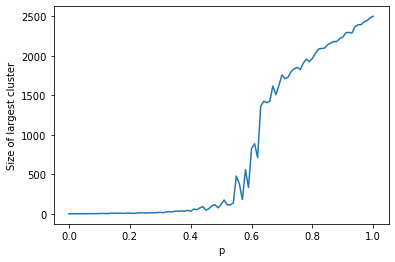

In [32]:
m = 50
n = 50
p_values = np.linspace(0, 1, num=101)
largest_cluster_sizes = []

for p in p_values:
    # Generate lattice matrix
    lattice = np.random.choice([0, 1], size=(m, n), p=[1-p, p])
    # Find size of largest cluster
    largest_cluster_area = check_percolation(lattice)
    largest_cluster_sizes.append(largest_cluster_area)

# Plot results
plt.plot(p_values, largest_cluster_sizes)
plt.xlabel('p')
plt.ylabel('Size of largest cluster')
plt.show()

> This plot imples that the algorithm is indeed working since the plot agrees with the one we have seen at the begining of the report, i.e. a phase transition around $p=0.59$

This code measures the running time of a percolation simulation on lattices of different sizes using the Hoshen-Kopelman algorithm, and plots the results on a log-log scale.

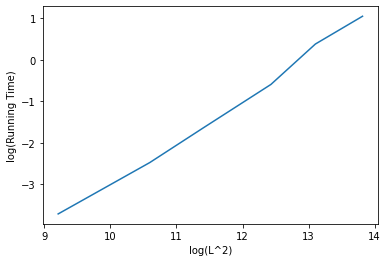

In [37]:
def measure_running_time(n, num_trials=5):
    p = 0.5  # probability of site being occupied
    running_time_sum = 0  # Initialize a sum to accumulate the running times
    for i in range(num_trials):  # Run the simulation for the specified number of trials
        lattice = generate_lattice(n, p)  # Generate a random lattice of size n x n
        start_time = time.time()  # Start the timer
        label_matrix, num_clusters = hoshen_kopelman(lattice)  # Apply the Hoshen-Kopelman algorithm to the lattice to label clusters and count their number
        largest_cluster_area = check_percolation(label_matrix)  # Check if there is percolation and get the size of the largest cluster
        end_time = time.time()  # Stop the timer
        running_time_sum += (end_time - start_time)  # Add the running time to the sum
    return running_time_sum / num_trials  # Return the average running time over the trials

system_sizes = [100, 200, 300, 500, 700, 1000]  # Define the lattice sizes to test
running_times = []  # Create an empty list to store the running times
for n in system_sizes:  # Loop over the lattice sizes
    running_time = measure_running_time(n)  # Measure the running time for the current lattice size
    running_times.append(running_time)  # Add the running time to the list

log_L_values = [np.log(L**2) for L in system_sizes]  # Take the log of the lattice sizes to use as the x-axis for the plot
log_time_list = [np.log(t) for t in running_times]  # Take the log of the running times to use as the y-axis for the plot

# Plot the results on a log-log scale
plt.plot(log_L_values, log_time_list)
plt.xlabel('log(L^2)')
plt.ylabel('log(Running Time)')
plt.show()


> This is a straight line meaning that the scaling relation is a power law on the size of the system

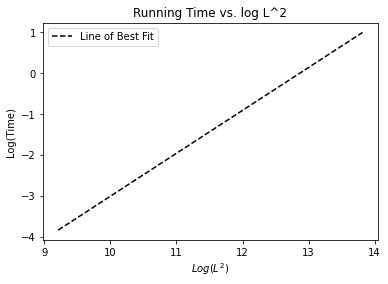

Gradient: 1.049730141918102


In [38]:
fit = np.polyfit(log_L_values, log_time_list, 1)
fit_fn = np.poly1d(fit) 
pylab.plot(log_L_values, fit_fn(log_L_values), '--k', label="Line of Best Fit")

pylab.xlabel("$Log(L^2)$")
pylab.ylabel("Log(Time) ")
pylab.title("Running Time vs. log L^2")
pylab.legend()
pylab.show()
print("Gradient:", fit[0])

>  This gradient means that the time complexity is given by $O(N)$

>  Improvement can be made to the find function as the following, known as path compression

In [ ]:
def uf_find(x):
    # Find the root of the tree containing x
    y = x
    while labels[y] != y:
        y = labels[y]
  
    # Path compression - make each node on the path from x to the root point directly to the root
    while labels[x] != x:
        z = labels[x]
        labels[x] = y
        x = z
    return y

> It turns out that path compression doesn't quite improve anything in this case (it gives the same time complexity, but the result is not shown to save some space)

## 3.3 The Newman-Ziff Algorithm

In the HK (Hoshen-Kopelman) algorithm, clusters are represented as trees, where each cluster has a single "root" site. The algorithm's efficiency can be improved by making modifications to the union and find functions. To make these modifications, the notion of pointer is introduced by Newman & Ziff

> "Pointer": Each cluster has a single “root” site, which is the
root of the corresponding tree, and all other sites possess pointers either to that root site or to another site in the cluster, such that by following a succession of such pointers we can get from any site to the root. By traversing trees in this way, it is simple to ascertain whether two sites are members of the same cluster: if their pointers lead to the same root site then they are, otherwise they are not.

> "weighted union": In the weighted union strategy, a separate list of cluster sizes is maintained, indexed by their cluster label. When two clusters are merged (union), the smaller of the two clusters is relabeled. This minimizes the number of relabelings needed and avoids repeated relabelings of the large percolating cluster.

> "path compression": In the find function, trees are traversed to find the root site of a cluster. If two initial sites lead to the same root, then they belong to the same cluster. After the traversal, all pointers along the path are changed to point directly to the root of their tree, a technique called "path compression." Path compression speeds up future find operations on the same sites.

The "weighted union/find with path compression" is the key idea of the Newman-Ziff algorithm, which improves the efficiency of the HK algorithm by reducing the number of relabelings and speeding up tree traversal during find operations. The complete NZ algorithm can be summarized as follows.

1. Initially all sites are clusters in their own right. Each is its own root site, and contains a record of its own size, which is 1.
2. Bonds are occupied in random order on the lattice.
3. Each bond added joins together two sites. We follow pointers from each of these sites separately until we reach the root sites of the clusters to which they belong. Root sites are identified by the fact that they do not possess pointers to any other sites. Then we go back along the paths we followed through each tree and adjust all pointers along those paths to point directly to the corresponding root sites.
4. If the two root sites are the same site, we need do nothing further.
5. If the two root sites are different, we examine the cluster sizes stored in them, and add a pointer from the root of the smaller cluster to the root of the larger, thereby making the smaller tree a subtree of the larger one. If the two are the same size, we may choose whichever tree we like to be the subtree of the other. We also update the size of the larger cluster by adding the size of the smaller one to it.


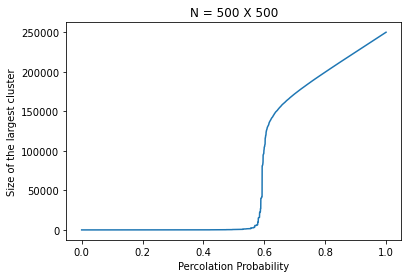

In [46]:
import numpy as np
import random
import pylab

L = 500  # Linear dimension
N = L * L
EMPTY = -(N + 1)

ptr = np.zeros(N, dtype=int)  # Array of pointers
nn = np.zeros((N, 4), dtype=int)  # Nearest neighbors
order = np.zeros(N, dtype=int)  # Occupation order


# Setting the boundaries
def boundaries():
    for i in range(N):
        nn[i, 0] = (i + 1) % N
        nn[i, 1] = (i + N - 1) % N
        nn[i, 2] = (i + L) % N
        nn[i, 3] = (i + N - L) % N

        if i % L == 0:
            nn[i, 1] = i + L - 1
        if (i + 1) % L == 0:
            nn[i, 0] = i - L + 1


# Generating the random orders of site occupation
def permutation():
    for i in range(N):
        order[i] = i

    for i in range(N):
        j = i + int((N - i) * random.random())
        order[i], order[j] = order[j], order[i]


# Find operation
def findroot(i):
    r = s = i
    while ptr[r] > 0:
        ptr[s] = ptr[r]
        s = r
        r = ptr[r]
    return r


# main algorithm
def percolate():
    X = []
    Y = []
    big = 0

    for i in range(N):
        ptr[i] = EMPTY

    for i in range(N):
        r1 = s1 = order[i]
        ptr[s1] = -1

        for j in range(4):
            s2 = nn[s1, j]
            if ptr[s2] != EMPTY:
                r2 = findroot(s2)
                if r2 != r1:
                    if ptr[r1] > ptr[r2]:
                        ptr[r2] += ptr[r1]
                        ptr[r1] = r2
                        r1 = r2
                    else:
                        ptr[r1] += ptr[r2]
                        ptr[r2] = r1

                    if -ptr[r1] > big:
                        big = -ptr[r1]

        X.append((i + 1) / N)
        Y.append(big)

    pylab.plot(X, Y, '-')
    pylab.xlabel("Percolation Probability")
    pylab.ylabel("Size of the largest cluster")
    pylab.title(f"N = {L} X {L}")
    pylab.show()
boundaries()
permutation()
percolate()

> It indeed works by showing the expected phase transition around $p=0.59$

To find the time complexity

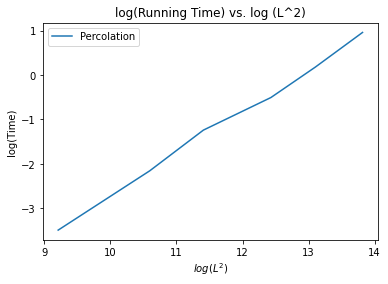

In [41]:
import numpy as np
import random
import time
import pylab

L_values = [100,200,300,500,700,1000]  # List of system sizes (L) to be tested

L_squared = [L**2 for L in L_values]  # Square of L values
log_L_squared = [np.log(x) for x in L_squared]  # Logarithm of L squared values

repeat = 7 # Number of times to repeat for each L value

# Function to measure running time of percolation algorithm for given system size L
def percolate_timing(L):
    N = L * L  # Total number of sites in the system
    EMPTY = -(N + 1)  # Indicator for empty site
    ptr = np.zeros(N, dtype=int)  # Array of pointers for finding roots
    nn = np.zeros((N, 4), dtype=int)  # Nearest neighbors for each site
    order = np.zeros(N, dtype=int)  # Occupation order of sites
    start_time = time.time()  # Record start time of the algorithm

    # Setting the boundaries of the system
    for i in range(N):
        nn[i, 0] = (i + 1) % N
        nn[i, 1] = (i + N - 1) % N
        nn[i, 2] = (i + L) % N
        nn[i, 3] = (i + N - L) % N

        if i % L == 0:
            nn[i, 1] = i + L - 1
        if (i + 1) % L == 0:
            nn[i, 0] = i - L + 1

    # Generating the random orders of site occupation
    for i in range(N):
        order[i] = i

    for i in range(N):
        j = i + int((N - i) * random.random())
        order[i], order[j] = order[j], order[i]

    # Function to find the root of a site
    def findroot(i):
        r = s = i
        while ptr[r] > 0:
            ptr[s] = ptr[r]
            s = r
            r = ptr[r]
        return r

    big = 0  # Variable to keep track of the size of the largest cluster

    # Main loop of the percolation algorithm
    for i in range(N):
        r1 = s1 = order[i]
        ptr[s1] = -1

        for j in range(4):
            s2 = nn[s1, j]
            if ptr[s2] != EMPTY:
                r2 = findroot(s2)
                if r2 != r1:
                    if ptr[r1] > ptr[r2]:
                        ptr[r2] += ptr[r1]
                        ptr[r1] = r2
                        r1 = r2
                    else:
                        ptr[r1] += ptr[r2]
                        ptr[r2] = r1

                    if -ptr[r1] > big:
                        big = -ptr[r1]

        if (i+1) % L == 0:
            break  # Stop percolation after L steps

    return time.time() - start_time  # Return running time of the algorithm

timing = []  # List to store timing results for each L value
for L in L_values:
    timing_L = []  # List to store timing results for each
    for i in range(repeat):
        timing_L.append(percolate_timing(L))
    timing.append(np.mean(timing_L))

pylab.plot(log_L_squared, np.log(timing), label="Percolation")

pylab.xlabel("$log(L^2)$")
pylab.ylabel("log(Time)")
pylab.title("log(Running Time) vs. log (L^2)")
pylab.legend()
pylab.show()


> This is a straight line meaning that the scaling relation is a power law on the size of the system

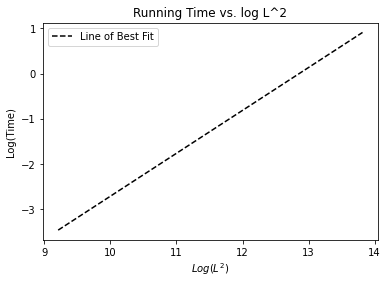

Gradient: 0.9493325587156483


In [42]:
fit = np.polyfit(log_L_squared, np.log(timing), 1)
fit_fn = np.poly1d(fit) 
pylab.plot(log_L_squared, fit_fn(log_L_squared), '--k', label="Line of Best Fit")

pylab.xlabel("$Log(L^2)$")
pylab.ylabel("Log(Time) ")
pylab.title("Running Time vs. log L^2")
pylab.legend()
pylab.show()
print("Gradient:", fit[0])

>  This gradient means that the time complexity is given by $O(N)$

# 4 Results and analysis

The mains results for time complexity are

>Stupid algorithm $O(N^{1.71})$

>Hoshen-Kopelman algorithm $O(N)$

>Newman-Ziff algorithm $O(N)$


The main focus of this study was to compare and analyze the performance of three different algorithms for the percolation problem on a two-dimensional square lattice: the stupid algorithm , the union/find algorithm (referred to as the "HK algorithm"), and the weighted-union/find algorithm with path compression (referred to as the "NZ algorithm").

The results clearly demonstrate that the HK and NZ outperform the stupid algorithm in terms of time complexity. The time complexity of the stupid algorithm is much higher than the other two algorithms, as it does not utilize any smart techniques such as union/find, weighted union/find, or path compression. Moreover, the time complexity of the stupid algorithm does not exhibit a simple power law relation with system size, as shown by the non-linear curve in the log(running time) against log(system size) plot.

On the other hand, the HK and NZ algorithms show a linear scaling with system size, with a gradient close to 1 in the log(running time) against log(system size) plot. This indicates that their running time follows a power law of the system size, with the power increasing with the system size. Although the measurements were limited by computational resources, with a small error in the gradient of 0.05 due to the limited number of repetitions, the performance of HK and NZ algorithms appears to be very similar. This suggests that the improvements introduced by weighted-union/find and path compression in NZ algorithm may not be significantly advantageous compared to the simpler HK algorithm, at least in the context of the studied 2D square lattice with system size up to 1000x1000.

>The improvements introduced by techniques such as weighted-union/find and path compression mainly affect the **upper bound** on the time complexity of the algorithms, which would only be observed in worst-case scenarios. However, due to the limited number of repetitions in our measurements, it is possible that these worst-case scenarios did not occur frequently, making the performance of HK and NZ algorithms effectively similar in the context of the studied system size and lattice geometry.

>Furthermore, our results suggest that the addition of path compression to the HK algorithm did not result in significant improvement in time complexity, as observed from our measurements. This implies that the weighted-union/find technique used in the NZ algorithm may also not contribute significantly to the performance of the algorithm, at least in the studied system size and lattice geometry. This finding is consistent with the observation that the performance of HK+path compression and NZ+path compression+weighted-union/find is comparable.

It is worth noting that the observed probability of phase transition, which occurred at approximately p=0.59, is consistent with the results reported by previous researchers. This further confirms that the implemented algorithms are running correctly.

However, it should be noted that the comparisons and analyses were conducted only for the simplest case of a 2D square lattice with a maximum system size of 1000x1000. To gain a deeper insight into the performance of these algorithms, further investigations can be conducted on lattices with higher dimensionality, more complicated connectivity, and larger system sizes with a larger number of repeated experiments. These additional experiments may provide a clearer distinction between the algorithms and reveal more insights into their performance characteristics.

In conclusion, the results of this study demonstrate that the HK and NZ algorithms perform better in terms of time complexity compared to the stupid algorithm for the percolation problem on a one-dimensional lattice. Although the NZ algorithm includes additional improvements such as path compression, the performance of HK and NZ algorithms appears to be similar in the context of the studied 2D square lattice with limited system size. Further investigations on more complex lattice geometries, higher dimensionality, and larger system sizes are recommended to gain a deeper understanding of the performance of these algorithms.